<a href="https://colab.research.google.com/github/AlessandroVol23/dlaicourse/blob/master/Exercises/Exercise%204%20-%20Handling%20Complex%20Images/Solution_Exercise4_Question.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Below is code with a link to a happy or sad dataset which contains 80 images, 40 happy and 40 sad. 
Create a convolutional neural network that trains to 100% accuracy on these images,  which cancels training upon hitting training accuracy of >.999

Hint -- it will work best with 3 convolutional layers.

In [13]:
import tensorflow as tf
import os
import zipfile


DESIRED_ACCURACY = 0.999

!wget --no-check-certificate \
    "https://storage.googleapis.com/laurencemoroney-blog.appspot.com/happy-or-sad.zip" \
    -O "/tmp/happy-or-sad.zip"

zip_ref = zipfile.ZipFile("/tmp/happy-or-sad.zip", 'r')
zip_ref.extractall("/tmp/h-or-s")
zip_ref.close()

class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('acc')>DESIRED_ACCURACY):
      print("\nReached {} accuracy so cancelling training!".format(DESIRED_ACCURACY))
      self.model.stop_training = True

callbacks = myCallback()

--2019-09-01 08:07:30--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/happy-or-sad.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.23.128, 2404:6800:4008:c00::80
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.23.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2670333 (2.5M) [application/zip]
Saving to: ‘/tmp/happy-or-sad.zip’

/tmp/happy-or-sad.z 100%[===================>]   2.55M  --.-KB/s    in 0.02s   

2019-09-01 08:07:30 (134 MB/s) - ‘/tmp/happy-or-sad.zip’ saved [2670333/2670333]



In [14]:
!ls /tmp/h-or-s/

happy  sad


In [0]:
# Directory with our training horse pictures
train_happy = os.path.join('/tmp/h-or-s/happy')

# Directory with our training human pictures
train_sad = os.path.join('/tmp/h-or-s/sad')

In [16]:
train_happy_names = os.listdir(train_happy)
print(train_happy_names[:10])

train_sad_names = os.listdir(train_sad)
print(train_sad_names[:10])

['happy1-10.png', 'happy1-15.png', 'happy2-03.png', 'happy2-18.png', 'happy2-02.png', 'happy2-14.png', 'happy2-06.png', 'happy1-05.png', 'happy1-18.png', 'happy1-03.png']
['sad2-03.png', 'sad2-13.png', 'sad1-10.png', 'sad1-13.png', 'sad2-11.png', 'sad2-17.png', 'sad1-15.png', 'sad1-11.png', 'sad2-04.png', 'sad1-12.png']


In [17]:
print('total training happy images:', len(os.listdir(train_happy)))
print('total training sad images:', len(os.listdir(train_sad)))

total training happy images: 40
total training sad images: 40


In [0]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

# Index for iterating over images
pic_index = 0

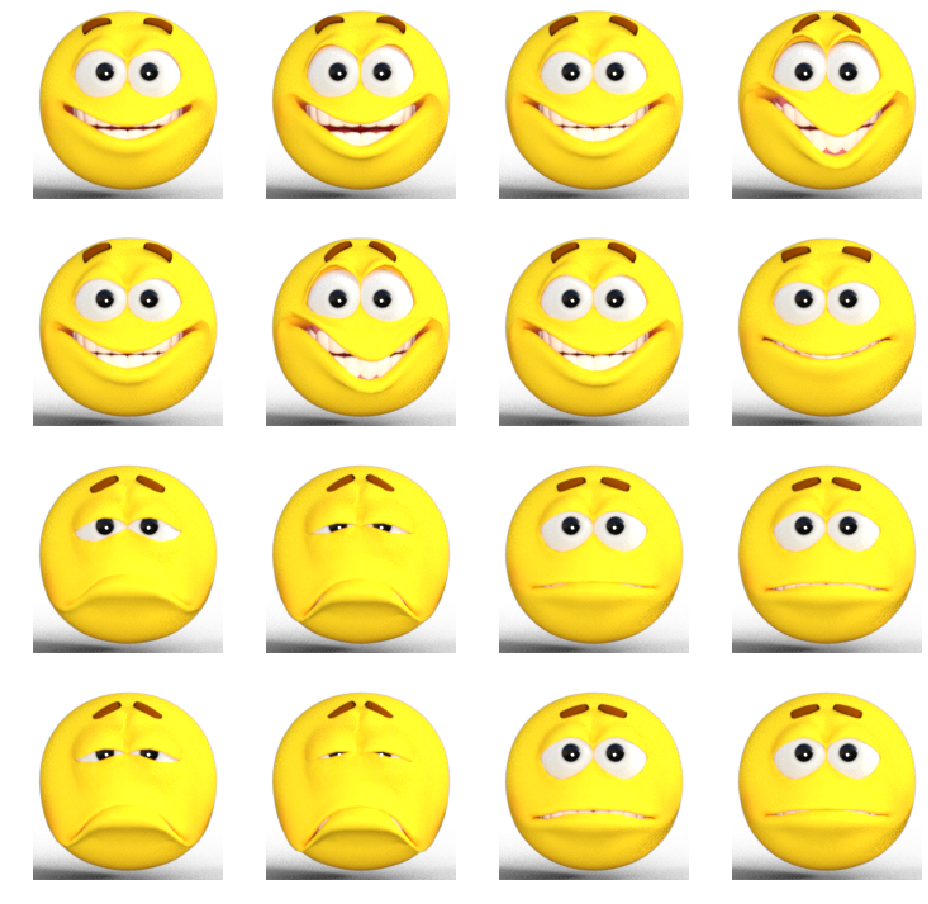

In [19]:
# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_happy_pix = [os.path.join(train_happy, fname) 
                for fname in train_happy_names[pic_index-8:pic_index]]
next_sad_pix = [os.path.join(train_sad, fname) 
                for fname in train_sad_names[pic_index-8:pic_index]]

for i, img_path in enumerate(next_happy_pix+next_sad_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()


In [0]:
# This Code Block should Define and Compile the Model
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(300, 300, 3)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Flatten(),
  # 512 neuron hidden layer
  tf.keras.layers.Dense(512, activation='relu'),
  # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('horses') and 1 for the other ('humans')
  tf.keras.layers.Dense(1, activation='sigmoid')
])

from tensorflow.keras.optimizers import RMSprop

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.001),
              metrics=['acc'])

In [21]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 298, 298, 16)      448       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 149, 149, 16)      0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 355216)            0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               181871104 
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 513       
Total params: 181,872,065
Trainable params: 181,872,065
Non-trainable params: 0
_________________________________________________________________


In [22]:
# This code block should create an instance of an ImageDataGenerator called train_datagen 
# And a train_generator by calling train_datagen.flow_from_directory

from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1/255)

train_generator = train_datagen.flow_from_directory(
        '/tmp/h-or-s',  # This is the source directory for training images
        target_size=(300, 300),  # All images will be resized to 150x150
        batch_size=128,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

# Expected output: 'Found 80 images belonging to 2 classes'

Found 80 images belonging to 2 classes.


In [23]:
# This code block should call model.fit_generator and train for
# a number of epochs. 
history = model.fit_generator(
      train_generator,
      steps_per_epoch=8,  
      epochs=15,
      verbose=1,
      callbacks=[callbacks])
    
# Expected output: "Reached 99.9% accuracy so cancelling training!""

Epoch 1/15
8/8 [==============================] - 6s 688ms/step - loss: 40.7296 - acc: 0.5203
Epoch 2/15
8/8 [==============================] - 3s 326ms/step - loss: 3.9879 - acc: 0.7375
Epoch 3/15
7/8 [=========================>....] - ETA: 0s - loss: 0.0022 - acc: 1.0000
Reached 0.999 accuracy so cancelling training!
8/8 [==============================] - 3s 328ms/step - loss: 0.0022 - acc: 1.0000
